# __1. DataFrame이 뭔가요?__

>  - DataFrame은 2차원(col과 row을 가짐)테이블 데이터 구조를 가지는 자료형
>  - Data Analysis, Machine Learning에서 data 변형을 위해 가장 많이 사용
>  - **주의** : Series나 DataFrame은 대소문자가 구분되므로 Series, DataFrame으로 사용

- DataFrame 데이터 살펴보기
>DataFrame의 구조 (인덱스와 컬럼)
 - 인덱스(Index) : 행의 레이블에 대한 정보를 보유하고 있음
 - 컬럼(Columns) : 열의 레이블에 대한 정보를 보유하고 있음
 - 인덱스와 컬럼 자체는 중복값일 수 없음

 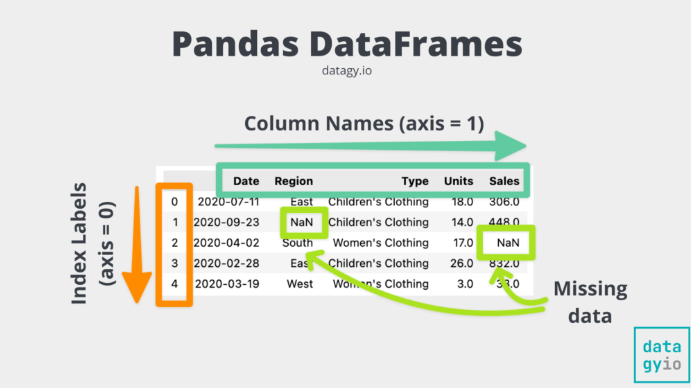

In [ ]:
# pandas를 호출하세요 alias(별칭)는 pd입니다.
import pandas as pd

### 1-1 DB를 읽어서 DataFrame생성하기</b>
> - pandas.read_sql 함수 사용
>  - 대부분의 업무에서는 분석하고자 하는 Datat가 존재할 것
>  - 이를 읽어 들이는 것부터 데이터 분석의 시작!
>  - 이번 실습에서 읽을 DB : sc_cust

In [ ]:
from impala.dbapi import connect
import pandas as pd

# Step 1: Impala 연결 설정
conn = connect(
    host='apramn102.hyundaicapital.com',  # Hue에서 사용하는 Impala 호스트 주소
    port=21053,               # Impala 기본 포트
    auth_mechanism='GSSAPI'   # 사용할 데이터베이스 이름
)

# Step 2: SQL 쿼리 실행 및 DataFrame으로 변환
query = "SELECT * FROM hcs_t_bdpedu_l2a.sc_cust;"
cust = pd.read_sql(query, conn)

# Step 3: 데이터프레임 확인
print(cust)

# Step 4: 연결 닫기
conn.close()

### 1-2. 데이터 살펴보기
- head, tail 함수사용하기
> - 데이터 전체가 아닌, 일부(처음부터, 혹은 마지막부터)를 간단히 보기 위한 함수 (default: 5줄)
 - **head, tail을 왜 사용할까?**
   - 광대한 데이터를 다룰 수 있는 Pandas의 특성상 특정변수에 제대로 데이터가 들어갔는지 간략히 확인
   - 데이터 자료형의 확인
   - 각 레이블에 맞는 데이터 매칭 확인

In [ ]:
# 상위 5개
cust.head()

In [ ]:
# 하위 5개
cust.tail()

In [ ]:
# shape : 데이터를 파악하는데 중요함
cust.shape

In [ ]:
# DataFrame의 columns들을 보여줌
cust.columns

In [ ]:
# 데이터 타입 및 각 아이템등의 정보를 보여줌
cust.info()

In [ ]:
# DataFrame의 기본적인 통계정보를 보여줌
cust.describe()

In [ ]:
# DataFrame의 데이터 종류
cust.dtypes

In [ ]:
# DataFrame 내 각각의 값 분포
cust.value_counts()

In [ ]:
# DataFrame의 특정 열에 값 분포
cust['sex_type'].value_counts()

# __2. Data 조회하기__
DataFrame에서 data를 __조회, 수정__해보고 이를 이해해본다.

### <b>2-1. 데이터 추출하기</b>

#### <b>1) column 선택하기</b>

> - 기본적으로 [ ]는 column을 추출 : 특정한 col을기준으로 모델링을 하고자 하는 경우
> - 컬럼 인덱스일 경우 인덱스의 리스트 사용 가능
>   - 리스트를 전달할 경우 결과는 Dataframe
>   - 하나의 컬럼명을 전달할 경우 결과는 Series

#### <b>2) 하나의 컬럼 선택하기</b>

> - Series 형태로 가지고 올 수도, DataFrame형태로 가지고 올 수 있음

In [ ]:
# cf : series 형태로 가지고 오기
cust['cust_class']

In [ ]:
# cf : Dataframe형태로 가지고 오기
cust[['cust_class']]

In [ ]:
# 문제
# termination_yn 컬럼만 선택하여 조회하시오
cust['termination_yn']

#### <b>3) 복수의 컬럼 선택하기</b>

In [ ]:
# 'cust_class' , 'age' 'r3m_avg_bill_amt'등 3개의 col 선택하기
cust[['cust_class', 'age', 'r3m_avg_bill_amt']]

#### <b>4) DataFrame slicing</b>

>- 특정 **행 범위**를 가지고 오고 싶다면 [ ]를 사용
>- DataFrame의 경우 기본적으로 [ ] 연산자가 **column 선택**에 사용되지만 **slicing은 row 레벨**로 지원

In [ ]:
# 7,8,9행을 가지고 옴 (인덱스 기준)
# [a:b]는 a 이상 b 미만을 의미
cust[7:10]

#### __5) boolean selection 연산으로 row 선택하기 (= 컬럼 조건문으로 행 추출하기)__

 - 해당 조건에 맞는 row만 선택
 - 조건을 명시하고 조건을 명시한 형태로 inedxing 하여 가지고 옴

In [ ]:
#조건을 전부다  [ ]안에 넣어 주면 됨
extract = cust[(cust['sex_type']=='M') & (cust['r3m_avg_bill_amt']>=50000) & (cust['r3m_avg_bill_amt']< 100000)]
extract.head()

In [ ]:
# 문제
# cust_class가 c 혹은 age가 50세 이상인 대상으로 구성된 데이터프레임을 생성하시오
# 데이터프레임 명은 new_df로 합니다
new_df = cust[(cust['cust_class']=='C') | (cust['age']>=50)]
new_df.head()

In [ ]:
# 조건문이 너무 길어지거나 복잡해지면...아래와 같은 방식으로 해도 무방함
# 남자이면서
sex = cust['sex_type']=='M'
# 3개월 평균 청구 금액이 50000 이상이면서 100000 미만
bill = (cust['r3m_avg_bill_amt']>=50000) & (cust['r3m_avg_bill_amt']< 100000)

cust[sex & bill].head()

#### <b>6) 정리 </b>

- 기본적인 대괄호는 col을 가지고 오는 경우 사용, 하지만 slicing은 row를 가지고 온다.

#### <b>7) 새 column 추가하기</b>

>- 데이터 전처리 과정에서 빈번하게 발생하는 것
>- insert 함수 사용하여 원하는 위치에 추가하기

In [ ]:
cust.dtypes

In [ ]:
# r3m_avg_bill_amt 두배로 새로운 col만들기
cust['r3m_avg_bill_amt2'] = cust['r3m_avg_bill_amt'] * 2
cust.dtypes

In [ ]:
cust.head()

In [ ]:
# 문제
# r3m_avg_bill_amt 와 r3m_avg_bill_amt2 를 더한 신규 컬럼을 만드시오
# 신규 컬럼명은 3m_avg_bill_amt3
cust['r3m_avg_bill_amt3'] = cust['r3m_avg_bill_amt2'] + cust['r3m_avg_bill_amt']
cust.head()

#### __8) column, row 삭제하기__

>- drop 함수 사용하여 삭제
>- axis는 삭제를 가로(행)기준으로 할 것인지, 세로(열)기준으로 할 것인지 명시하는 'drop()'메소드의 파라미터임
>- 리스트를 사용하면 멀티플 col 삭제 가능

In [ ]:
# axis : dataframe은 차원이 존재 함으로 항상 0과 1이 존재
# (0은 행레벨, 1을 열 레벨)
cust.drop('sex_type', axis=1)

In [ ]:
#원본 데이터를 열어 보면 원본 데이터는 안 지워진 상태
cust.head()

In [ ]:
# 원본 데이터를 지우고자 한다면...
# 방법1 : 데이터를 지우고 다른 데이터 프레임에 저장
cust1=cust.drop('sex_type', axis=1)
cust1.head()

In [ ]:
#방법2 :inplace 인자 사용
#cust = cust.drop('sex_type', inplace = True)

In [ ]:
# 원본확인
cust

In [ ]:
# 문제
# npay_yn 컬럼을 삭제하시오
cust.drop('npay_yn', axis=1)

# Chapter 2. DataFrame 변형하기

# __1. DataFrame group by 이해하기__


### <b>1-1. 데이터 묶기</b>

In [ ]:
import pandas as pd
import numpy as np

#### <b>1) 그룹화(groupby)</b>

  + 같은 값을 하나로 묶어 통계 또는 집계 결과를얻기위해 사용하는 것
  + 아래의 세 단계를 적용하여 데이터를 그룹화(groupping) / 특정한 col을 기준으로 데이터를 그룹핑 하여 통계에 활용하는 것
    - 데이터 분할(split) : 어떠한 기준을 바탕으로 데이터를 나누는 일
    - operation 적용(applying) : 각 그룹에 어떤 함수를 독립적으로 적용시키는 일
    - 데이터 병합(cobine) : 적용되어 나온 결과들을 통합하는 일
  + 데이터 분석에 있어 사용빈도가 높음
  + groupby의 결과는 dictionary형태임


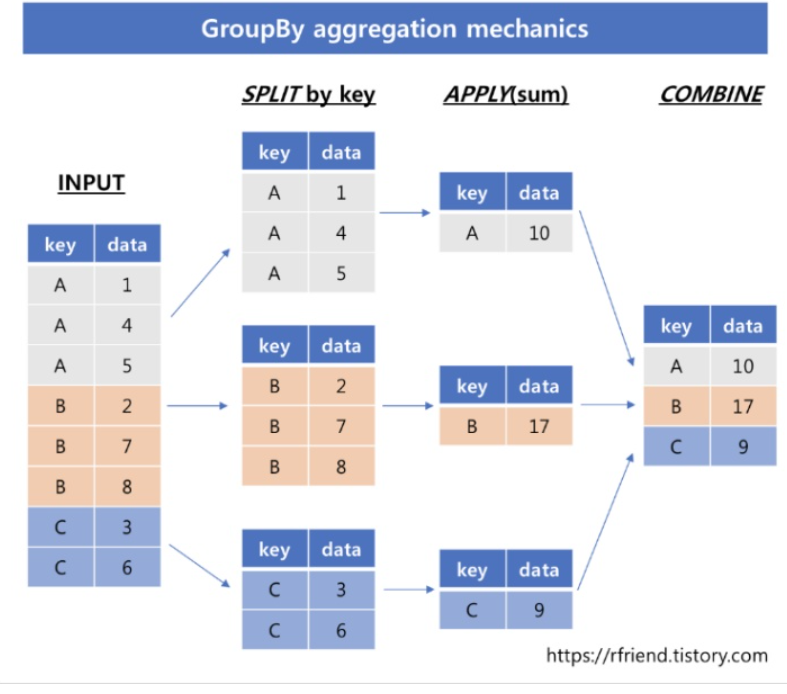

> ##### __1-1) groupby의 groups 속성__
> - 각 그룹과 그룹에 속한 index를 dict 형태로 표현

In [ ]:
# 파라미터 값으로 col의 리스트나 col을 전달
# 출력은 우선 dataframe이라고 하는 객체임(그룹을 생성까지 한 상태)

gender_group = cust.groupby('sex_type')
gender_group

In [ ]:
# groups를 활용하여 그룹의 속성을 살펴보기
gender_group.groups

>##### __1-2) groupby 내부 함수 활용하기__
 - 그룹 데이터에 적용 가능한 통계 함수(NaN은 제외하여 연산)
 - count : 데이터 개수
 - size : 집단별 크기
 - sum  : 데이터의 합
 - mean, std, var : 평균, 표준편차, 분산
 - min, max : 최소, 최대값

In [ ]:
# count 함수 확인
gender_group.count()

In [ ]:
gender_group.sum()

In [ ]:
# mean 함수 확인
# Calculate the mean for numeric columns only
gender_group.mean(numeric_only=True)

In [ ]:
# max값 확인하기
gender_group.max(numeric_only=True)

In [ ]:
# 특정 col만 보는 경우 : gender별 base_ym의 평균
gender_group['base_ym'].mean()

# Chapter 2. DataFrame 병합하기

# __1. concat함수 활용__

두 개 이상의 데이터프레임을 하나로 합치는 데이터 병합(merge)이나 연결(concatenate)을 지원합니다.

In [ ]:
import pandas as pd
import numpy as np

### <b>1-1. concat 함수 사용하여 DataFrame 병합하기</b>

> - pandas.concat 함수  (배열결합 : concatenate)
>  - 데이터의 속성 형태가 동일한 데이터 셋 끼리 합칠때 사용 (DataFrame을 물리적으로 붙여주는 함수)
> - 열 or 행 레벨로 병합하는 것

#### <b>1) column명이 같은 경우</b>
>  ignore_index, axis 활용

In [ ]:
df1 = pd.DataFrame({'key1' : [0,1,2,3,4], 'value1' : ['a', 'b', 'c','d','e']}, index=[0,1,2,3,4])
df2 = pd.DataFrame({'key1' : [3,4,5,6,7], 'value1' : ['c','d','e','f','g']}, index=[3,4,5,6,7])

In [ ]:
df1

In [ ]:
df2

> ##### __concat함수 옵션__

> - **ignore_index** : 기존 index를 무시하고자 하는 경우
>   - False : 기존 index유지(default) / True : 기존 index무시(index재배열)
> - **axis**
>   - 0 : 위+아래로 합치기(row레벨) / 1 : 왼쪽+오른쪽으로 합치기(col레벨)

In [ ]:
# ignore_index에 대한이해  (직접 타이핑 해보세요)
pd.concat([df1, df2], ignore_index=False)

In [ ]:
# axis=0,1 비교해 보기  (직접 타이핑 해보세요)
pd.concat([df1, df2], axis =0)

#### <b>2) column명이 다른 경우</b>

> * concat함수중에 join에 대한이해
> * join 방식은 outer의 경우 합집합, inner의 경우 교집합을 의미

In [ ]:
df3 = pd.DataFrame({'a':['a0','a1','a2', 'a3'], 'b':['b0','b1','b2','b3'], 'c':['c0','c1','c2','c3']}, index = [0,1,2,3])
df4 = pd.DataFrame({'a':['a2','a3','a4', 'a5'], 'b':['b2','b3','b4','b5'], 'c':['c2','c3','c4','c5'], 'd':['d1','d2','d3','d4']}, index = [2,3,4,5])

In [ ]:
df3

In [ ]:
df4

In [ ]:
pd.concat([df3, df4], join='outer')

In [ ]:
pd.concat([df3, df4], join='inner')

#### <b>3) index 중복 여부 확인</b>

> * concat함수중에 verify_integrity에 대한 이해
> * verify_integrity=False가 default임으로 error발생을 하지 않음
> * verify_integrity=True인 경우 error 발생

In [ ]:
df5 = pd.DataFrame({'A':['A0','A1','A2'], 'B':['B0','B1','B2'], 'C':['C0','C1','C2'], 'D':['D0','D1','D2']}, index=['I0','I1','I2'])
df6 = pd.DataFrame({'A':['AA2','A3','A4'], 'B':['BB2','B3','B4'], 'C':['CC2','C3','C4'], 'D':['DD2','D3','D4']}, index=['I2','I3','I4'])

In [ ]:
df5

In [ ]:
df6

In [ ]:
pd.concat([df5, df6], verify_integrity=False)

# __2. merge & join 함수 활용__


### <b>2-1. DataFrame merge</b>

> - Database의 Table들을 Merge/Join하는 것과 유사함
> - 특정한 column(key)을 기준으로 병합
>   - join 방식: how 파라미터를 통해 명시(특정한 col을 바탕으로 join 하는 것)
- inner: 기본 merge방법, 일치하는 값이 있는 경우
-'left': 왼쪽 데이터프레임(여기서는 'customer')의 모든 행을 유지
- 'right': 오른쪽 데이터프레임(여기서는 'orders')의 모든 행을 유지
- 'outer': 양쪽 데이터프레임의 모든 행을 유지

In [ ]:
customer = pd.DataFrame({'cust_id' : np.arange(6),
                    'name' : ['철수', '영희', '길동', '영수', '수민', '동건'],
                    '나이' : [40, 20, 21, 30, 31, 18]})

orders = pd.DataFrame({'cust_id' : [1, 1, 2, 2, 2, 3, 3, 1, 4, 9],
                    'item' : ['치약', '칫솔', '이어폰', '헤드셋', '수건', '생수', '수건', '치약', '생수', '케이스'],
                    'quantity' : [1, 2, 1, 1, 3, 2, 2, 3, 2, 1]})

In [ ]:
customer

In [ ]:
orders

#### <b>1) merge함수의 on 옵션</b>

>  - join 대상이 되는 column 명시

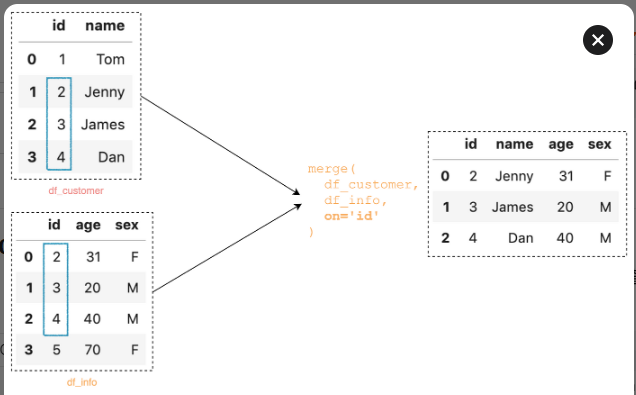

In [ ]:
# 기본적인 Merge방식은 inner임 (직접 타이핑 해보세요)
# customer의 cust_id 5번과 orders의 cust_id 9번이 없는 것을 확인
pd.merge(customer, orders, on='cust_id')

In [ ]:
# merge하고자 하는 컬럼 명칭을 on에 명시한다.
# 여러개인 경우 리스트  일치하는 것만 가지고 옴
pd.merge(customer, orders, on='cust_id', how='inner')

In [ ]:
# 왼쪽 테이블을 기준으로 Merge (여기서는 customer기준)
pd.merge(customer, orders, on='cust_id', how='left')

In [ ]:
# 오른쪽 테이블을 기준으로 Merge (여기서는 orders기준)
pd.merge(customer, orders, on='cust_id', how='right')

In [ ]:
# outer : Left와 Right를 합친 것
pd.merge(customer, orders, on='cust_id', how='outer')